### Author: Youchen (Victor) Zhang

In [1]:
reset -fs

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%config InlineBackend.figure_format = 'retina'

In [3]:

data = [["US Population", "Our Customers", 
         "US Population", "Our Customers",
         "US Population", "Our Customers",
         "US Population", "Our Customers",
         "US Population", "Our Customers",
         "US Population", "Our Customers",
         "US Population", "Our Customers"],
        ['Segment 1', 'Segment 1',
         'Segment 2', 'Segment 2',
         'Segment 3', 'Segment 3', 
         'Segment 4', 'Segment 4', 
         'Segment 5', 'Segment 5',
         'Segment 6', 'Segment 6',
         'Segment 7', 'Segment 7'],
       [16, 9, 7, 10, 10, 15, 10, 18, 10, 17, 32, 20, 15, 11]]



rows = zip(data[0], data[1], data[2])
column_names = ['Categories', "Segments", 'Values']
df = pd.DataFrame(rows, 
                  columns=column_names)

df

,Categories,Segments,Values
0,US Population,Segment 1,16
1,Our Customers,Segment 1,9
2,US Population,Segment 2,7
3,Our Customers,Segment 2,10
4,US Population,Segment 3,10
5,Our Customers,Segment 3,15
6,US Population,Segment 4,10
7,Our Customers,Segment 4,18
8,US Population,Segment 5,10
9,Our Customers,Segment 5,17


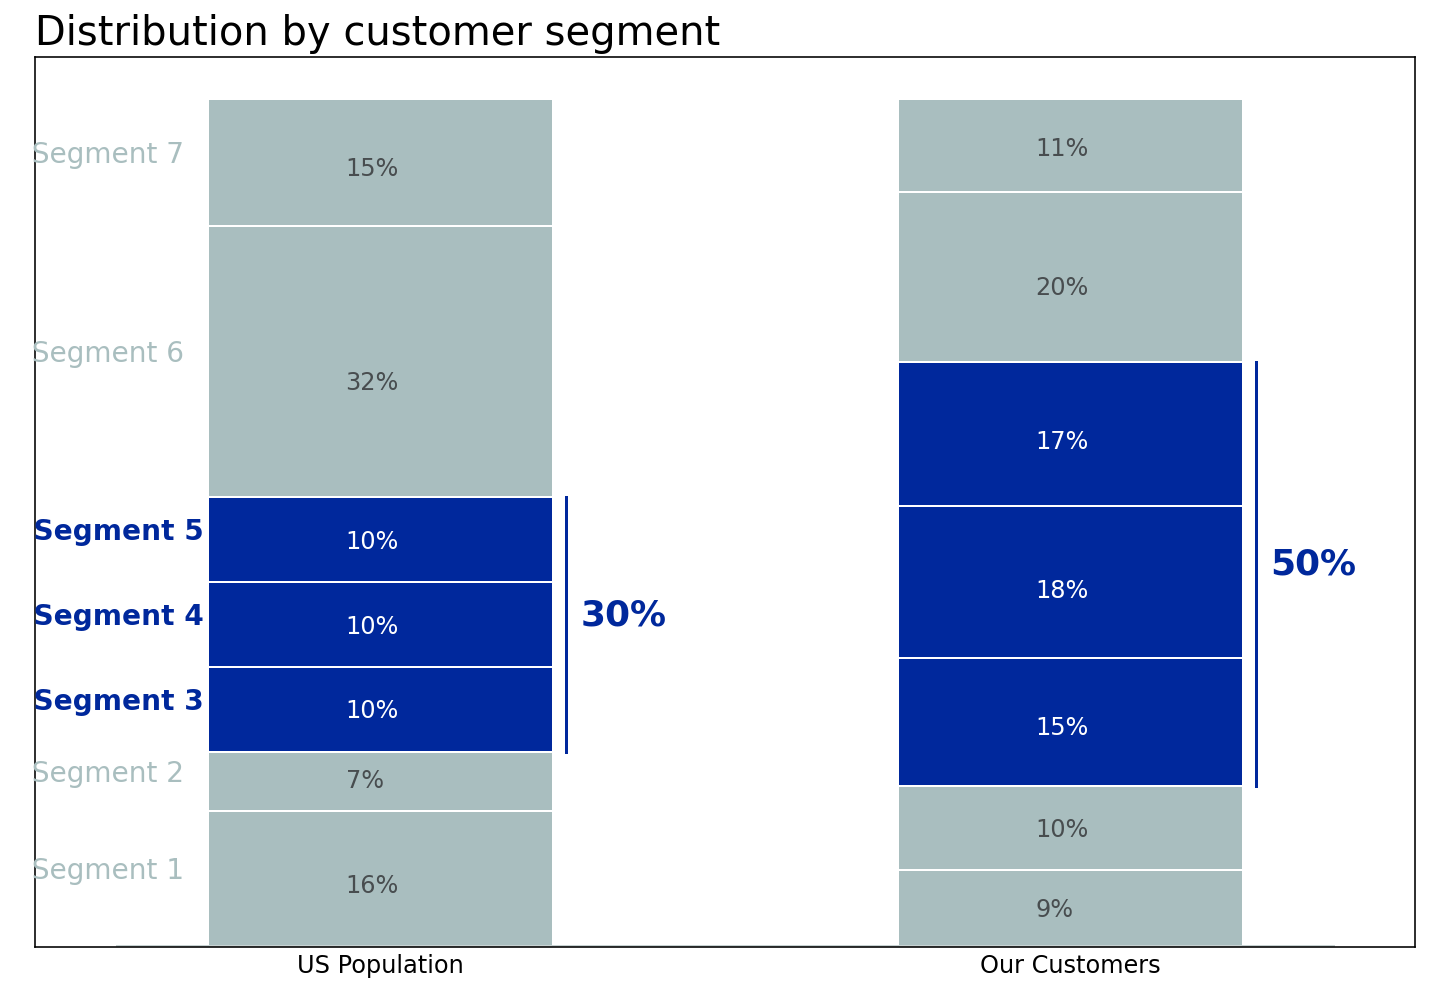

In [4]:
fig, ax = plt.subplots(figsize=(10,7))  
margin_bottom = np.zeros(len(df['Categories'].drop_duplicates()))
segments = list(df['Segments'].drop_duplicates())
colors = ["#a9bebf", "#a9bebf","#00289c", "#00289c", "#00289c", "#a9bebf", "#a9bebf"]

US_Population_offset = 0
Our_Customers_offset = 0

for num, segment in enumerate(segments):
    
    values = list(df[df['Segments'] == segment].loc[:, 'Values'])

    axe = df[df['Segments'] == segment].plot.bar(x='Categories',y='Values', 
                                           rot=0, legend=False,
                                           ax=ax, stacked=True, 
                                           bottom = margin_bottom,
                                           color=colors[num], 
                                           edgecolor='white',fontsize=12
                                        
                                           )
    
    axe.xaxis.label.set_visible(False)
    axe.axes.get_yaxis().set_visible(False)
    axe.xaxis.set_tick_params(labelsize=12, colors="black")
    axe.tick_params(axis=u'both', which=u'both',length=0)
    
    
    if num == 2 or num == 3 or num == 4:
        num_color = "white"
        weight = 'bold'
    else:
        num_color = "#484d4f"
        weight = 'normal'
        
    axe.text(0-0.05, US_Population_offset+values[0]/2.5, 
             f"{values[0]}%", color=num_color, fontsize=12)
    axe.text(1-0.05, Our_Customers_offset+values[1]/2.5,
             f"{values[1]}%", color=num_color, fontsize=12)
    
    
    axe.text(-0.53,US_Population_offset+values[0]/2, 
             f"  {segments[num]}", fontsize=14, color=colors[num],fontweight=weight)
    
    US_Population_offset += values[0] 
    Our_Customers_offset += values[1]
    
    margin_bottom += values

    
ax.set_facecolor('white')
plt.title("Distribution by customer segment", loc='left', fontsize=20) 
plt.tight_layout()
plt.plot([-0.38, 1.38], [0, 0], color="#c7d2d2", linestyle='-', linewidth=2.5)
plt.plot([0+0.25+0.02, 0+0.25+0.02], [16+7,16+7+30], color="#00289c", linestyle='-', linewidth=1.5)
plt.plot([1+0.25+0.02, 1+0.25+0.02], [9+10, 9+10+15+18+17], color="#00289c", linestyle='-', linewidth=1.5)
plt.text(0+0.25+0.02*2, (16+7+16+7+30)/2, "30%", color="#00289c", fontsize=18, fontweight='bold')
plt.text(1+0.25+0.02*2, (9+10+9+10+15+18+17)/2, "50%", color="#00289c", fontsize=18, fontweight='bold')
plt.show()  
   


In [5]:
df_life_expectancy = pd.read_csv("/Users/victor/MSDS/msds593/data/life-expectancy.csv")
df_life_expectancy.head(5)


,Entity,Code,Year,Life expectancy
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878
2,Afghanistan,AFG,1952,28.361
3,Afghanistan,AFG,1953,28.852
4,Afghanistan,AFG,1954,29.350


In [6]:
df_life_expectancy[df_life_expectancy['Entity']=='China']

,Entity,Code,Year,Life expectancy
3480,China,CHN,1930,32.000
3481,China,CHN,1934,34.000
3482,China,CHN,1936,35.000
3483,China,CHN,1942,37.000
3484,China,CHN,1949,41.000
...,...,...,...,...
3550,China,CHN,2015,75.928
3551,China,CHN,2016,76.210
3552,China,CHN,2017,76.470
3553,China,CHN,2018,76.704


In [7]:
df_life_expectancy[df_life_expectancy['Entity']=='Russia']

,Entity,Code,Year,Life expectancy
13776,Russia,RUS,1896,31.900000
13777,Russia,RUS,1900,30.500000
13778,Russia,RUS,1920,20.500000
13779,Russia,RUS,1921,23.799999
13780,Russia,RUS,1922,24.700001
...,...,...,...,...
13867,Russia,RUS,2015,71.464000
13868,Russia,RUS,2016,71.835000
13869,Russia,RUS,2017,72.139000
13870,Russia,RUS,2018,72.386000


In [8]:
df_life_expectancy[df_life_expectancy['Entity']=='Japan']

,Entity,Code,Year,Life expectancy
8490,Japan,JPN,1865,36.425838
8491,Japan,JPN,1870,36.592640
8492,Japan,JPN,1875,36.799438
8493,Japan,JPN,1880,37.036480
8494,Japan,JPN,1885,37.328400
...,...,...,...,...
8574,Japan,JPN,2015,83.879000
8575,Japan,JPN,2016,84.090000
8576,Japan,JPN,2017,84.290000
8577,Japan,JPN,2018,84.470000


In [9]:
df_life_expectancy[df_life_expectancy['Entity']=='Germany']

,Entity,Code,Year,Life expectancy
6346,Germany,DEU,1875,38.369999
6347,Germany,DEU,1885,39.439999
6348,Germany,DEU,1895,42.380001
6349,Germany,DEU,1905,45.450001
6350,Germany,DEU,1911,49.000000
...,...,...,...,...
6420,Germany,DEU,2015,80.770000
6421,Germany,DEU,2016,80.902000
6422,Germany,DEU,2017,81.039000
6423,Germany,DEU,2018,81.180000


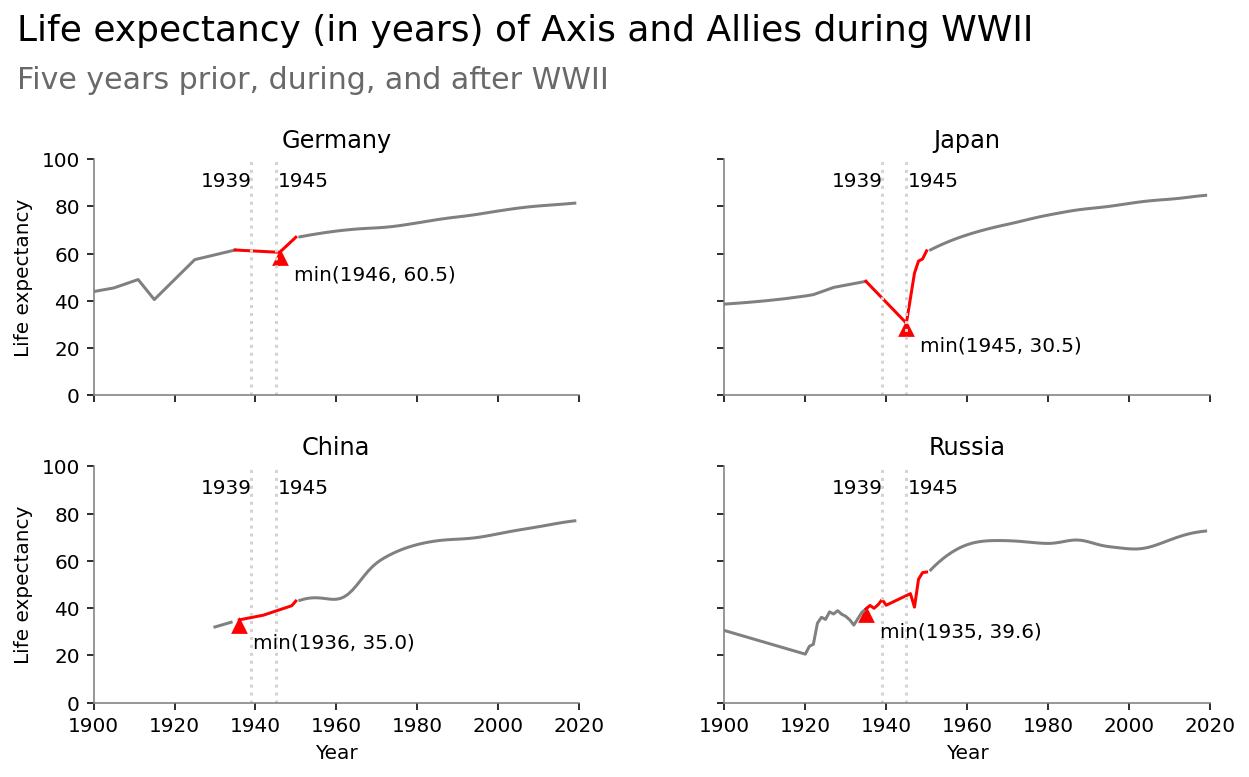

In [12]:
lg = '#808080'

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(10,5), gridspec_kw={'hspace':0.3, 'wspace':0.3})
axes_list = [item for sublist in axes for item in sublist] 

country_names = ["Germany", "Japan", "China", "Russia"] 
start_of_ww2 = 1939
end_of_ww2 = 1945

df_before_ww2 = df_life_expectancy[(df_life_expectancy['Year'] <= 1935)]
df_ww2 = df_life_expectancy[(df_life_expectancy['Year'] >= 1935) & (df_life_expectancy['Year'] <= 1950)]
df_after_ww2 = df_life_expectancy[(df_life_expectancy['Year'] > 1950)]


for country_name in country_names:
    ax = axes_list.pop(0)
    df_before_ww2[df_before_ww2['Entity']== country_name].plot(x='Year', y='Life expectancy', ax=ax, label=country_name, color="grey",legend=False)
    df_ww2[df_ww2['Entity']==country_name].plot(x='Year', y='Life expectancy', ax=ax, label="Germany", color="red",legend=False)
    df_after_ww2[df_after_ww2['Entity']==country_name].plot(x='Year', y='Life expectancy', ax=ax, label=country_name, color="grey",legend=False)                                                                 
         
    min_life_expectancy = df_ww2[df_ww2['Entity']==country_name]['Life expectancy'].min()
    min_life_expectancy_year = int(df_ww2[(df_ww2['Entity']==country_name) &  (df_ww2['Life expectancy']==min_life_expectancy)]['Year'])

    ax.scatter(x=[min_life_expectancy_year], y=[min_life_expectancy-2], s=70, clip_on=False, linewidth=0, marker="^", color='red')
    ax.annotate(f"min({min_life_expectancy_year}, {min_life_expectancy:.1f})", xy=[min_life_expectancy_year , min_life_expectancy-10], xytext=[7, -2], textcoords='offset points')
    ax.set_title(country_name)
    ax.set_ylim(0,100)
    ax.set_xlim(1900,2020, 5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(lg)
    ax.spines['left'].set_color(lg)
    ax.set_ylabel("Life expectancy")
    ax.set_facecolor('white')
    ax.grid(linewidth=0.25)
    ax.axvline(start_of_ww2, 0, 90, color="#D3D3D3", linestyle=":")
    ax.axvline(end_of_ww2, 0, 90, color="#D3D3D3", linestyle=":")
    ax.annotate(start_of_ww2, xy=[start_of_ww2-15, 90], xytext=[5, -2], textcoords='offset points')
    ax.annotate(end_of_ww2, xy=[end_of_ww2-2, 90], xytext=[5, -2], textcoords='offset points')
    ax.grid(False)                              

ax.text(1725,280, 'Life expectancy (in years) of Axis and Allies during WWII', fontsize=18, clip_on=False )
ax.text(1725, 260, 'Five years prior, during, and after WWII', fontsize=15, color='dimgrey')
plt.savefig('fig.png',bbox_inches='tight') 
plt.subplots_adjust(hspace=1)


In [15]:
df = pd.read_csv('https://github.com/TheEconomist/covid-19-excess-deaths-tracker/blob/master/output-data/excess-deaths/brazil_excess_deaths.csv?raw=True') 
df.head(5)

,country,region,region_code,start_date,end_date,year,month,population,total_deaths,covid_deaths,...,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change,total_deaths_per_7_days,covid_deaths_per_7_days,expected_deaths_per_7_days,excess_deaths_per_7_days,non_covid_deaths_per_7_days,covid_deaths_per_100k_per_7_days,excess_deaths_per_100k_per_7_days
0,Brazil,Recife,26,2020-01-01,2020-01-31,2020,1,1645727,1334,0,...,0.000000,19.125286,0.308805,301.225806,0.000000,230.153226,71.072581,301.225806,0.000000,4.318613
1,Brazil,Recife,26,2020-02-01,2020-02-29,2020,2,1645727,1244,1,...,0.060763,17.591010,0.303300,300.275862,0.241379,230.396552,69.879310,300.034483,0.014667,4.246106
2,Brazil,Recife,26,2020-03-01,2020-03-31,2020,3,1645727,1386,7,...,0.425344,19.216431,0.295630,313.388964,1.582773,241.881561,71.507402,311.806191,0.096175,4.345034
3,Brazil,Recife,26,2020-04-01,2020-04-30,2020,4,1645727,1815,238,...,14.461694,50.524783,0.845450,423.500000,55.533333,229.483333,194.016667,367.966667,3.374395,11.789116
4,Brazil,Recife,26,2020-05-01,2020-05-31,2020,5,1645727,2979,897,...,54.504787,119.552028,1.945131,672.677419,202.548387,228.403226,444.274194,470.129032,12.307533,26.995619


In [16]:
df.columns, df['region'].unique(), df.shape

(Index(['country', 'region', 'region_code', 'start_date', 'end_date', 'year',
        'month', 'population', 'total_deaths', 'covid_deaths',
        'expected_deaths', 'excess_deaths', 'non_covid_deaths',
        'covid_deaths_per_100k', 'excess_deaths_per_100k',
        'excess_deaths_pct_change', 'total_deaths_per_7_days',
        'covid_deaths_per_7_days', 'expected_deaths_per_7_days',
        'excess_deaths_per_7_days', 'non_covid_deaths_per_7_days',
        'covid_deaths_per_100k_per_7_days',
        'excess_deaths_per_100k_per_7_days'],
       dtype='object'),
 array(['Recife', 'Manaus', 'Fortaleza', 'Rio de Janeiro', 'São Paulo'],
       dtype=object),
 (35, 23))

In [18]:
df = df[['region', 'month', 'excess_deaths_pct_change']]
df.head()

,region,month,excess_deaths_pct_change
0,Recife,1,0.308805
1,Recife,2,0.303300
2,Recife,3,0.295630
3,Recife,4,0.845450
4,Recife,5,1.945131


In [21]:
# Reordering data according to plot on Economist
Fortaleza = df[df['region'] == 'Fortaleza'] 
Recife = df[df['region'] == 'Recife']
Manaus = df[df['region'] == 'Manaus']
Rio = df[df['region'] == 'Rio de Janeiro'] 
Paulo = df[df['region'] == 'São Paulo']
df = pd.concat([Paulo, Rio, Manaus, Recife, Fortaleza], axis=0)
df.reset_index(drop=True, inplace=True)
df

,region,month,excess_deaths_pct_change
0,São Paulo,1,0.311975
1,São Paulo,2,0.083130
2,São Paulo,3,0.211488
3,São Paulo,4,0.490942
4,São Paulo,5,0.482173
5,São Paulo,6,0.523341
6,São Paulo,7,0.369215
7,Rio de Janeiro,1,0.083212
8,Rio de Janeiro,2,0.135663
9,Rio de Janeiro,3,0.167212


In [24]:
def colorize(pct): 
    if pct < 0:
        return '#d1e5f0'
    elif ((pct > 0) & (pct < 0.25)):
        return '#fddbc7'
    elif ((pct > 0.25) & (pct < 0.50)):
        return '#f4a582'
    elif ((pct > 0.50) & (pct < 1)):
        return '#d6604d'
    elif ((pct > 1) & (pct < 2)):
        return '#b2182b'
    elif pct > 2:
        return '#67001f'

In [25]:
df['colors'] = df['excess_deaths_pct_change'].apply(colorize)

In [28]:
colors = [df[df['month']==1]['colors'],
          df[df['month']==2]['colors'],
          df[df['month']==3]['colors'],
          df[df['month']==4]['colors'],
          df[df['month']==5]['colors'],
          df[df['month']==6]['colors'],
          df[df['month']==7]['colors']]

In [29]:
region_list = df['region'].unique().tolist()
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July']

In [30]:
color_list = ['#d1e5f0', '#fddbc7', '#f4a582', '#d6604d', '#b2182b', '#67001f']

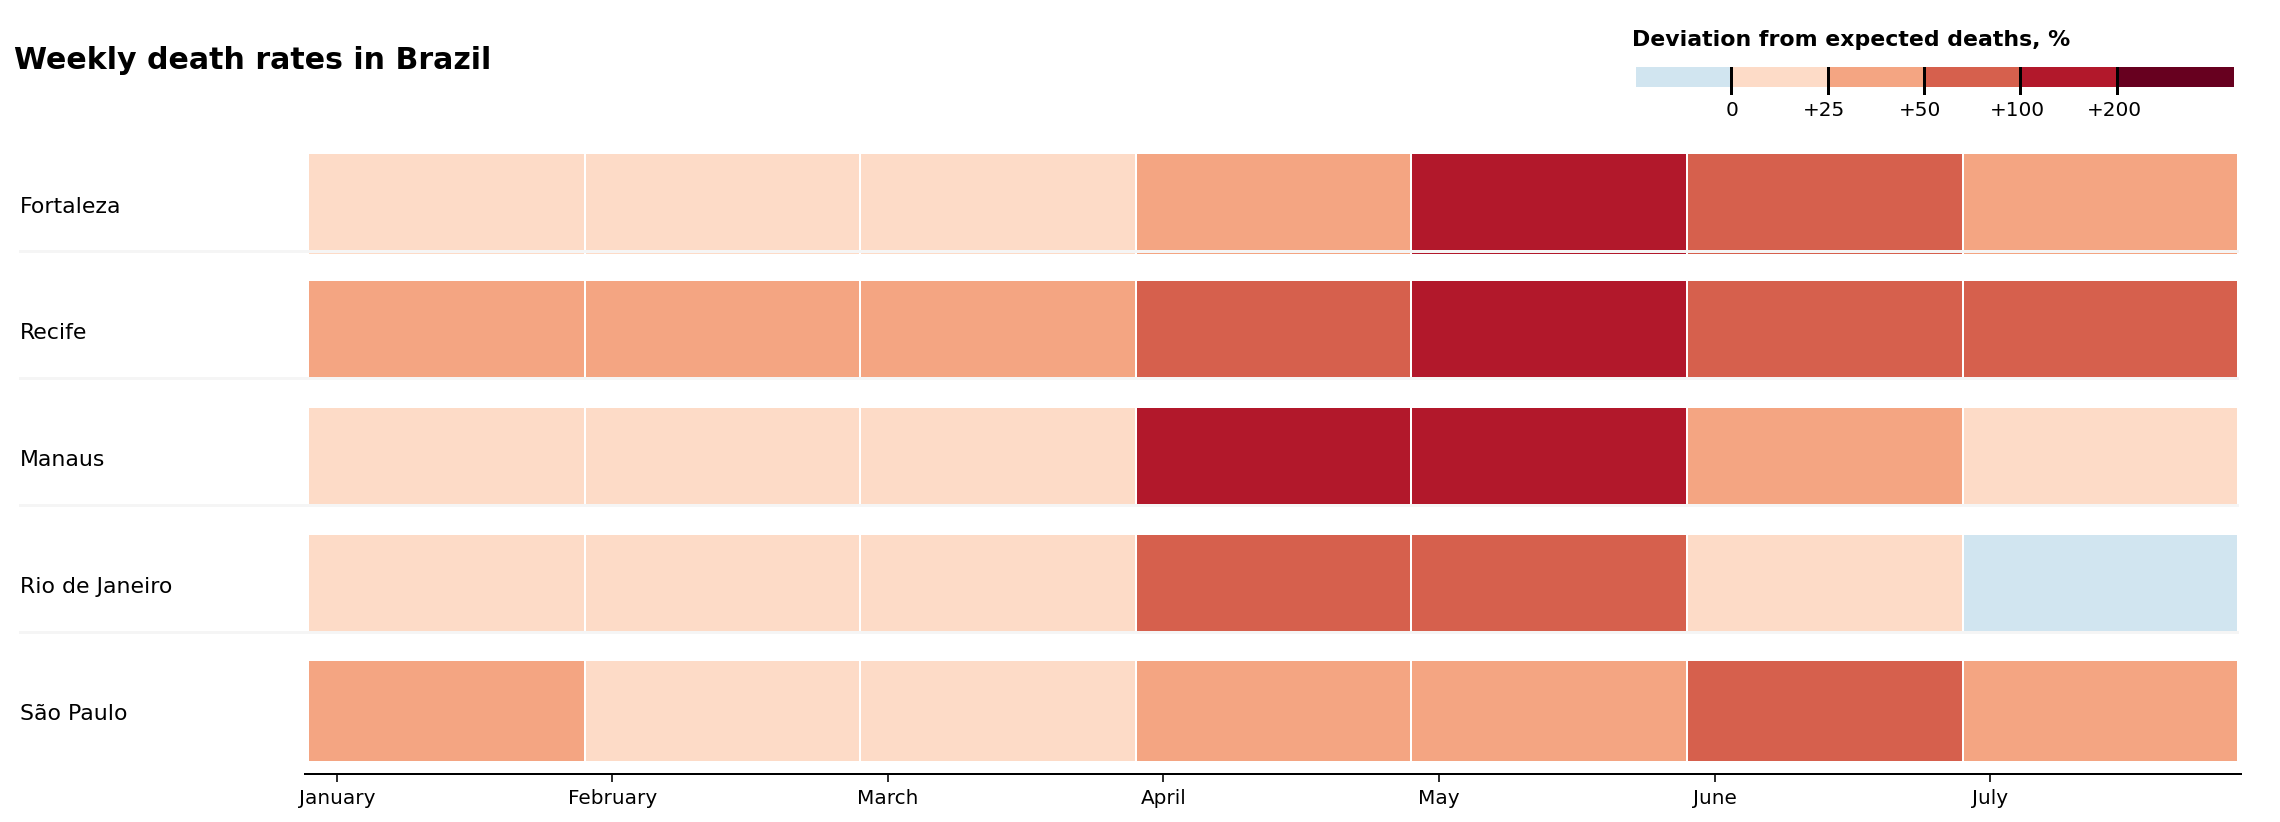

In [35]:
fig, ax = plt.subplots(figsize=(20,7)) # Set x-axis limits
ax.set_xlim(0, 8.1) # Set y-axis limits
ax.set_ylim(0,6)
   # Remove borders
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
ax.spines['left'].set_visible(False) 
ax.spines['bottom'].set_visible(False)
# Hide x-axis and y-axis
ax.tick_params(axis='both', which='both', left=False)
# Set y-axis tick labels
ax.set_yticks(np.arange(0.5, 5.5)) 
ax.set_yticklabels(region_list, ha='left', fontsize=11)
# Set x-axis tick labels
ax.set_xticks(np.arange(1.1, 8.1)) 
ax.set_xticklabels(month_list)
# x-axis and y-axis lengths
num_regions = df['region'].unique().size
num_months = df['month'].unique().size
ones = np.ones(num_regions) 
y_pos = np.arange(0.5, 5.5)

# Creating bars
for i in reversed(range(7)):
    ax.barh(y_pos, (i+2)*ones, edgecolor='white', color=colors[i]) 
    if i == 0:
        ax.barh(y_pos, (i+1)*ones, color='white')
# Creating horizontal lines
for i in range(1,5):
    ax.plot([-0.05,7.995], [i+0.125,i+0.125], clip_on=False, color='whitesmoke')

# Add artificial x-axis so it fits properly
ax.axhline(y=0, xmin=0.122, xmax=0.988, lw=2.5, color='black')

# Create discrete color bar with lines
for i in range(6):
    ax.plot([5.85+i*0.35, 6.2+i*0.35], [5.5, 5.5], color=color_list[i], lw=10)
for i in range(5):
    ax.plot([6.16+i*0.35, 6.16+i*0.35],[5.57, 5.37],color='black')

# Set up text
ax.text(5.8, 5.75, 'Deviation from expected deaths, %', fontsize=11, fontweight='bold')
for i in range(5):
    if i == 0:
        ax.text(6.14+i*0.35, 5.2, f'{i}') 
        continue
    if i == 3:
        ax.text(6.05+i*0.35, 5.2, '+100') 
        continue
    if i == 4:
        ax.text(6.05+i*0.35, 5.2, '+200') 
        continue
    else:
        ax.text(6.07+i*0.35, 5.2, f'+{i*25}')
# Add title
ax.text(-0.07, 5.57, 'Weekly death rates in Brazil', fontsize=15, fontweight='bold', clip_on=False)
plt.show()